### Challenge Overview: EXPLORE Data Science Academy Classification Hackathon

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
#pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for data preparation and model building
import re
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

from sklearn.utils import resample

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

import pickle

import warnings

warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# Loading in the Data
train_df =  pd.read_csv('train_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
# look at Dataset information:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [5]:
print(train_df['lang_id'].unique())

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']


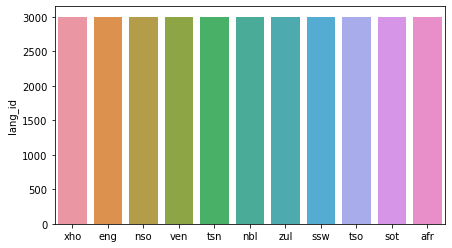

In [6]:
# Plot Class Distributions:
plt.figure(figsize=(7,4))
sns.barplot(data=train_df, x=train_df['lang_id'].unique(), y=train_df['lang_id'].value_counts())
plt.show()

In [7]:
train_df[:1]

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [8]:
# Define Function to remove punctuation
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

In [9]:
train_df['clean_text'] = train_df['text'].apply(remove_punctuation)

#### Tokenization

In [10]:
# Converting text into Tokens(word-lists):
tokenizer = TreebankWordTokenizer()
train_df['clean_text'] = train_df['clean_text'].apply(tokenizer.tokenize)
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [11]:
def chop_stopwords(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [12]:
train_df['clean_text'] = train_df['clean_text'].apply(chop_stopwords)

In [13]:
# Lemmatize the text Messages:
lemmatizer = WordNetLemmatizer()
train_df['clean_text'] = train_df['clean_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [14]:
# Revert back to sentence:
for i in range(len(train_df['clean_text'])):
    train_df['clean_text'][i] = " ".join(train_df['clean_text'][i])
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department transport inv...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [16]:
train_df['clean_text'] = train_df['clean_text'].apply(remove_punctuation)
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department transport inv...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### Split Data Into Features and Labels:

In [17]:
X = train_df['clean_text'] # Features
X = np.array(X)
y = train_df['lang_id'] # Labels

In [18]:
# Tain - Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

#### Bag of Words:

In [19]:
# Switch between vectorizers
vect1 = CountVectorizer(lowercase=True, stop_words='english')
vect2 = TfidfVectorizer()                                             

In [20]:
bow1 = vect1.fit_transform(X_train) # Create Count Vectors - Vocabulary
bow2 = vect2.fit_transform(X_train) # 
X_test = vect2.transform(X_test) 

In [21]:
# Creating ML models
logreg = LogisticRegression()

logreg.fit(bow2, y_train)
#nb.fit(bow2, y_train)

LogisticRegression()

In [22]:
#### Testing:
y_pred1 = logreg.predict(X_test)
#y_pred2 = nb.predict(X_test)

##### Performance Metrics:

In [24]:
# Evaluate LogisticRegrassion model:
print(classification_report(y_test, y_pred1, target_names=train_df['lang_id'].unique()))

              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       908
         eng       1.00      1.00      1.00       918
         nso       0.99      0.98      0.98       890
         ven       1.00      1.00      1.00       891
         tsn       1.00      1.00      1.00       921
         nbl       0.99      1.00      1.00       916
         zul       1.00      1.00      1.00       871
         ssw       1.00      1.00      1.00       883
         tso       1.00      1.00      1.00       933
         sot       0.98      1.00      0.99       876
         afr       0.98      0.97      0.97       893

    accuracy                           0.99      9900
   macro avg       0.99      0.99      0.99      9900
weighted avg       0.99      0.99      0.99      9900



<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

#### Save Model as file:

In [25]:
save_path = 'logreg_model.pkl'

with open(save_path, 'wb') as file:
    pickle.dump(logreg, file)

### Model Predictions on the Test Dataset:

#### Load the Test Dataset:

In [26]:
test_df = pd.read_csv('test_set.csv')

In [27]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [28]:
# Define Function to remove punctuation
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

In [29]:
test_df['clean_text'] = test_df['text'].apply(remove_punctuation)

#### Tokenization

In [30]:
# Converting text into Tokens(word-lists):
tokenizer = TreebankWordTokenizer()
test_df['clean_text'] = test_df['text'].apply(tokenizer.tokenize)
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","[Mmasepala, ,, fa, maemo, a, a, kgethegileng, ..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[Uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,"[Tshivhumbeo, tshi, fana, na, ngano, dza, vhat..."
3,4,Kube inja nelikati betingevakala kutsi titsini...,"[Kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,Winste op buitelandse valuta.,"[Winste, op, buitelandse, valuta, .]"


In [31]:
def chop_stopwords(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [32]:
test_df['clean_text'] = test_df['clean_text'].apply(chop_stopwords)

In [33]:
# Lemmatize the text Messages:
lemmatizer = WordNetLemmatizer()
test_df['clean_text'] = test_df['clean_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","[Mmasepala, ,, fa, maemo, kgethegileng, letlel..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[Uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,"[Tshivhumbeo, tshi, fana, na, ngano, dza, vhat..."
3,4,Kube inja nelikati betingevakala kutsi titsini...,"[Kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,Winste op buitelandse valuta.,"[Winste, op, buitelandse, valuta, .]"


In [34]:
# Revert back to sentence:
for i in range(len(test_df['clean_text'])):
    test_df['clean_text'][i] = " ".join(test_df['clean_text'][i])
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","Mmasepala , fa maemo kgethegileng letlelela kg..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu .
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta .


In [35]:
test_df['clean_text'] = test_df['clean_text'].apply(remove_punctuation)
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo kgethegileng letlelela kga...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta


#### Load Saved Model:

In [36]:
model_path = 'logreg_model.pkl'
with open(model_path, 'rb') as file:
    unpickled_model = pickle.load(file)

In [37]:
X1 = test_df['clean_text']
X1 = vect2.transform(X1)

#### Make Predictions on Test Dataset:

In [38]:
# Test Set Predictions:
y_hat = unpickled_model.predict(X1)

In [39]:
# Creating data frame for the predicted values:
preds = pd.DataFrame()
preds['index'] = test_df.index + 1
preds['lang_id'] = y_hat
preds.set_index('index', inplace=True)

In [40]:
# Save prediction as .csv:
preds.to_csv('logreg_preds.csv')

In [41]:
preds.head()

,lang_id
index,
1,ssw
2,nbl
3,ven
4,ssw
5,ssw


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic